# Group 28 BUAN 6341.001 Applied Machine Learning -  Regression
## Guru Prasad Kumar - GXP190002
## Sandhya Subramani - SXS190016

Predict the sale price of San Francisco houses using regression techiques

Data Description:


1) GrLivArea: Above ground living area

2) Street: Type of Street 

3) OverallQual: Overall Quality of the house  

4) GarageCars: Number of cars the garage can fit

5) GarageArea: Area of the Garage  

6) LandSlope: Type of LandSlope  

7) TotRmsAbvGrd: Total Number of Rooms above Ground       

8) Utilities: Type of Utilities 






9) FullBath: Total full bathrooms available     









10) X1stFlrSF: First Floor Sq.Ft  


























11) TotalBsmtSF: Total Basement Sq.Ft 



















12) age: Age of the House  
















13) YearBuilt: Year the house was built    





















14) Fireplaces: Total Number of Fireplaces present 






15) GarageYrBlt: Year the Garage was built  















16) MasVnrArea: Mason Veneer Area   

























17) LotArea: Area of the Lot  












18) X2ndFlrSF: Second Floor Sq.Ft                                                                                                                                  












19) BedroomAbvGr: Total Number of Bedrooms above ground 











20) BsmtFinSF1 : Finished Basement Sq.Ft    












21) HalfBath: Total number of half baths












22) SalePrice: Sale Price of the house

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading the dataset
df = pd.read_csv('SF_HousingPrice.csv')

In [3]:
#setting Id as index to avoid an index label being created again
df = df.set_index('Id')

In [4]:
#reading the top 5 rows of the dataset
df.head()

,GrLivArea,Street,OverallQual,GarageCars,GarageArea,LandSlope,TotRmsAbvGrd,Utilities,FullBath,X1stFlrSF,...,YearBuilt,Fireplaces,GarageYrBlt,MasVnrArea,LotArea,X2ndFlrSF,BedroomAbvGr,BsmtFinSF1,HalfBath,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1445,Pave,6,2.0,484.0,Gtl,6.0,AllPub,2.0,831.0,...,1900.0,0.0,1957.0,0.0,14235.0,614.0,3.0,0.0,0.0,184380.7391
2,965,Pave,5,2.0,580.0,Gtl,4.0,AllPub,1.0,965.0,...,1996.0,NaN,1998.0,0.0,11105.0,0.0,2.0,870.0,NaN,169364.4692
3,1692,Pave,7,2.0,513.0,Gtl,8.0,AllPub,2.0,892.0,...,1997.0,1.0,1997.0,0.0,9337.0,800.0,3.0,NaN,1.0,175846.1798
4,1026,Pave,5,1.0,308.0,Gtl,5.0,AllPub,1.0,1026.0,...,NaN,0.0,NaN,0.0,15240.0,0.0,3.0,198.0,NaN,189673.2953
5,876,Pave,5,2.0,484.0,Gtl,5.0,AllPub,1.0,876.0,...,NaN,0.0,1977.0,0.0,7480.0,0.0,3.0,480.0,0.0,174401.3177


In [5]:
#checking the shape of the dataset
df.shape

(1342, 22)

It has 1342 rows and 22 columns. This satisfies the data size pre-requisite.

In [6]:
#checking the column names of the dataset
df.columns

Index(['GrLivArea', 'Street', 'OverallQual', 'GarageCars', 'GarageArea',
       'LandSlope', 'TotRmsAbvGrd', 'Utilities', 'FullBath', 'X1stFlrSF',
       'TotalBsmtSF', 'age', 'YearBuilt', 'Fireplaces', 'GarageYrBlt',
       'MasVnrArea', 'LotArea', 'X2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1',
       'HalfBath', 'SalePrice'],
      dtype='object')

In [7]:
#checking the min,max,count,std dev of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1342.0,1487.920268,492.181031,407.0000,1112.000000,1430.0000,1728.000000,5095.0000
OverallQual,1342.0,6.090909,1.447286,1.0000,5.000000,6.0000,7.000000,10.0000
GarageCars,1248.0,1.776442,0.782029,0.0000,1.000000,2.0000,2.000000,5.0000
GarageArea,1248.0,474.211538,219.253257,0.0000,319.000000,480.0000,577.250000,1488.0000
TotRmsAbvGrd,1334.0,6.402549,1.505885,3.0000,5.000000,6.0000,7.000000,15.0000
FullBath,1248.0,1.580128,0.554913,0.0000,1.000000,2.0000,2.000000,4.0000
X1stFlrSF,1222.0,1158.031097,401.931584,407.0000,874.000000,1077.0000,1381.000000,5095.0000
TotalBsmtSF,1221.0,1048.490172,429.843383,0.0000,796.000000,990.0000,1312.000000,2660.0000
age,1248.0,35.504808,30.038040,-1.0000,7.000000,33.0000,53.000000,129.0000
YearBuilt,1160.0,1971.224138,30.425395,1879.0000,1953.000000,1973.0000,2001.000000,2009.0000


In [8]:
#checking the top null values of the dataset
df.isnull().sum().sort_values(ascending = False).head(15)

YearBuilt       182
TotalBsmtSF     121
X1stFlrSF       120
LotArea         103
X2ndFlrSF       101
MasVnrArea       96
BedroomAbvGr     95
BsmtFinSF1       94
GarageYrBlt      94
Fireplaces       94
GarageCars       94
age              94
HalfBath         94
FullBath         94
GarageArea       94
dtype: int64

In [9]:
#checking the percentage of missing values in the dataset for each column
missing_values= df.isnull().sum().sort_values(ascending=False)
total_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
total_missing_values_percent2 = pd.concat([missing_values,total_percent],axis=1,keys=['Total_count','Percent'])
total_missing_values_percent2.head(15)

,Total_count,Percent
YearBuilt,182,0.135618
TotalBsmtSF,121,0.090164
X1stFlrSF,120,0.089419
LotArea,103,0.076751
X2ndFlrSF,101,0.075261
MasVnrArea,96,0.071535
BedroomAbvGr,95,0.070790
BsmtFinSF1,94,0.070045
GarageYrBlt,94,0.070045
Fireplaces,94,0.070045


There are more 94 null values in each column which satisfies the pre-requisite of the dataset containing 5% missing data

In [10]:
#checking the datatype of each column
df.dtypes

GrLivArea         int64
Street           object
OverallQual       int64
GarageCars      float64
GarageArea      float64
LandSlope        object
TotRmsAbvGrd    float64
Utilities        object
FullBath        float64
X1stFlrSF       float64
TotalBsmtSF     float64
age             float64
YearBuilt       float64
Fireplaces      float64
GarageYrBlt     float64
MasVnrArea      float64
LotArea         float64
X2ndFlrSF       float64
BedroomAbvGr    float64
BsmtFinSF1      float64
HalfBath        float64
SalePrice       float64
dtype: object

There are atleast three columns that are categorical (Eg: Street, LandSlope, Utilities) which satisfy the required criteria.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E60AA50FC8>,
      dtype=object)

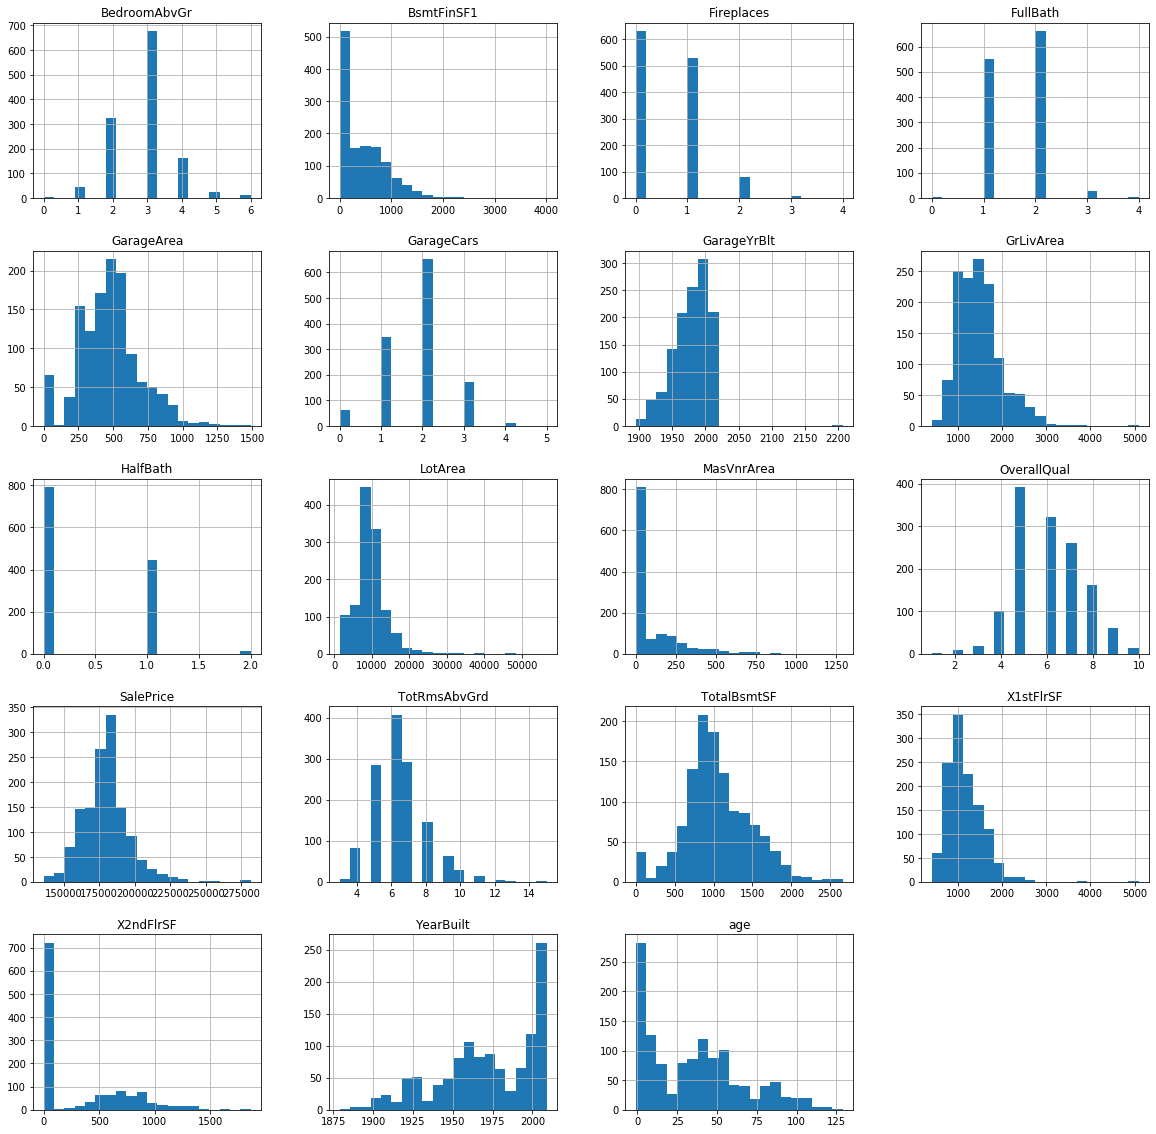

In [11]:
#checking the histogram to note the distribution of the columns in dataset
df.hist(bins = 20 , figsize= (20,20))

In [12]:
df.columns

Index(['GrLivArea', 'Street', 'OverallQual', 'GarageCars', 'GarageArea',
       'LandSlope', 'TotRmsAbvGrd', 'Utilities', 'FullBath', 'X1stFlrSF',
       'TotalBsmtSF', 'age', 'YearBuilt', 'Fireplaces', 'GarageYrBlt',
       'MasVnrArea', 'LotArea', 'X2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1',
       'HalfBath', 'SalePrice'],
      dtype='object')

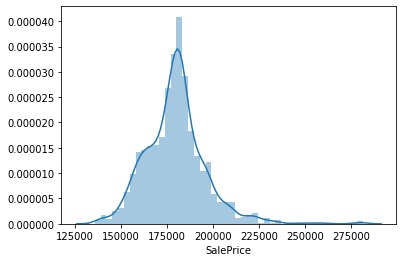

In [13]:
sns.distplot(df['SalePrice'])
plt.show()

In [14]:
#Imputing median to fill the null values in the dataset where data distribution is skewed

df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna((df['TotalBsmtSF'].median()))
df['X1stFlrSF'] = df['X1stFlrSF'].fillna((df['X1stFlrSF'].median()))
df['X2ndFlrSF'] = df['X2ndFlrSF'].fillna((df['X2ndFlrSF'].median()))
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].fillna((df['TotRmsAbvGrd'].median()))
df['LotArea'] = df['LotArea'].fillna((df['LotArea'].median()))
df['MasVnrArea'] = df['MasVnrArea'].fillna((df['MasVnrArea'].median()))
df['YearBuilt'] = df['YearBuilt'].fillna((df['YearBuilt'].median()))
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna((df['BsmtFinSF1'].median()))
df['GarageCars'] = df['GarageCars'].fillna((df['GarageCars'].median()))
df['HalfBath'] = df['HalfBath'].fillna((df['HalfBath'].median()))
df['age'] = df['age'].fillna((df['age'].median()))
df['Fireplaces'] = df['Fireplaces'].fillna((df['Fireplaces'].median()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna((df['GarageYrBlt'].median()))

In [15]:
#Imputing mean to fill the null values in the dataset where data distribution is skewed

df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna((df['BedroomAbvGr'].mean()))
df['FullBath'] = df['FullBath'].fillna((df['FullBath'].mean()))
df['GarageArea'] = df['GarageArea'].fillna((df['GarageArea'].mean()))

In [16]:
#checking the null values after imputation
df.isnull().sum().sort_values(ascending = False)

SalePrice       0
HalfBath        0
Street          0
OverallQual     0
GarageCars      0
GarageArea      0
LandSlope       0
TotRmsAbvGrd    0
Utilities       0
FullBath        0
X1stFlrSF       0
TotalBsmtSF     0
age             0
YearBuilt       0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
LotArea         0
X2ndFlrSF       0
BedroomAbvGr    0
BsmtFinSF1      0
GrLivArea       0
dtype: int64

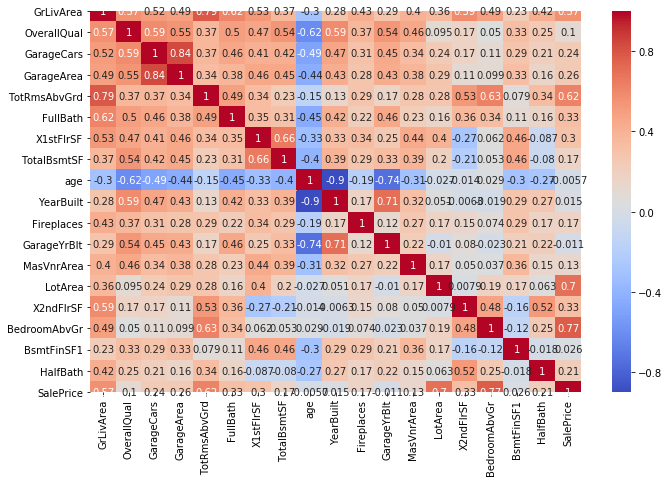

In [17]:
#plotting the same corr in a heatmap
#Based on the graph we can see that garage cars is highly correlated to grage area which is justified
cor=df.corr()
plt.subplots(figsize=(11,7))
sns.heatmap(cor,annot=True, cmap = 'coolwarm')
cor_target = abs(cor["SalePrice"])

In [18]:
#now checking the distribution of categorical variable "Street"
df['Street'].value_counts()

Pave    1336
Grvl       6
Name: Street, dtype: int64

In [19]:
#now checking the distribution of categorical variable "LandSlope"
df['LandSlope'].value_counts()

Gtl    1286
Mod      53
Sev       3
Name: LandSlope, dtype: int64

In [20]:
#now checking the distribution of categorical variable "Utilities"
df['Utilities'].value_counts()

AllPub    1325
NoSeWa      17
Name: Utilities, dtype: int64

In [21]:
#Renaming columns to obtain more clarity and idea
df = df.rename(columns={"GrLivArea": "GroundLivingArea",
                        "TotRmsAbvGrd": "RoomsAboveGround",
                        "X1stFlrSF": "1stFloorSqFt",
                        "X2ndFlrSF": "2nd FloorSqFt",
                        "TotalBsmtSF": "BasementSqFt", 
                        "SalePrice" : "Price",
                        "GarageYrBlt":"GarageBuiltYear",
                        "MasVnrArea":"MasonryVeneerArea",
                        "BsmtFinSF1": "BasementFinalSqFt"})

In [22]:
#reading the column names again to check if renaming has worked properly
df.columns

Index(['GroundLivingArea', 'Street', 'OverallQual', 'GarageCars', 'GarageArea',
       'LandSlope', 'RoomsAboveGround', 'Utilities', 'FullBath',
       '1stFloorSqFt', 'BasementSqFt', 'age', 'YearBuilt', 'Fireplaces',
       'GarageBuiltYear', 'MasonryVeneerArea', 'LotArea', '2nd FloorSqFt',
       'BedroomAbvGr', 'BasementFinalSqFt', 'HalfBath', 'Price'],
      dtype='object')

In [23]:
#using one hot encoder for the categorical column "LandSlope"
one_hot_LandSlope = pd.get_dummies(df.LandSlope)

In [24]:
#dropping the column LandSlope and concatenating the one_hot_LandSlope to the dataset
df.drop(['LandSlope'],axis=1,inplace =True)
df = pd.concat([df, one_hot_LandSlope], axis=1)

In [25]:
#Label encoding 0's and 1's to ordinal values
df['Utilities'] = df['Utilities'].map( {'AllPub': 1, 'NoSeWa': 0} ).astype(int)
df['Street'] = df['Street'].map( {'Pave': 1, 'Grvl': 0} ).astype(int)

In [26]:
#converting the target variable or prediction variable to integer
df['Price'] = df['Price'].astype(int)

In [27]:
#Removing the target variable and reassigning it to variable y known as target set
X=df.drop('Price',axis=1).values
y=df['Price']

In [28]:
#creating the formal X and y split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [29]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()  #this scaler helps handle outliers better
scaler.fit(X_train_orig)
X_train= scaler.transform(X_train_orig)
X_test= scaler.transform(X_test_orig)

#Scores
train_score=[]
test_score=[]

# KNN Regressor

In [30]:
#running K Neighbors Regressor for variety of neighbors

param_grid5 = {'n_neighbors': [5,6,7,8,9,10],'weights': ['uniform','distance'],'metric': ['euclidean','manhattan']}
kn=GridSearchCV(KNeighborsRegressor(), param_grid5, verbose=1,cv=5,n_jobs=10,return_train_score=True)
kn.fit(X_train,y_train)
train=kn.cv_results_['mean_train_score']
print("Training score: {}".format(train.mean()))
print("Best cross-validation score: {}".format(kn.best_score_))
print("Best parameters: {}".format(kn.best_params_))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.2s


Training score: 0.8407802239727801
Best cross-validation score: 0.6133750298772974
Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


[Parallel(n_jobs=10)]: Done 120 out of 120 | elapsed:   13.6s finished


In [31]:
#General Model and we are fitting the 7 neigbors as best from the above run
knn=KNeighborsRegressor(n_neighbors=6, weights = 'distance', metric = 'manhattan')
knn_model=knn.fit(X_train,y_train)

print("train_score for KNeigbors Regressor:",knn_model.score(X_train,y_train))
print("test_score for KNeigbors Regressor:", knn_model.score(X_test,y_test))

train_score for KNeigbors Regressor: 1.0
test_score for KNeigbors Regressor: 0.5994155698087669


In [32]:
#calculating the accuracies
knn_accuracies = cross_val_score(estimator = knn_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies.mean()*100))

Accuracy: 61.11 %


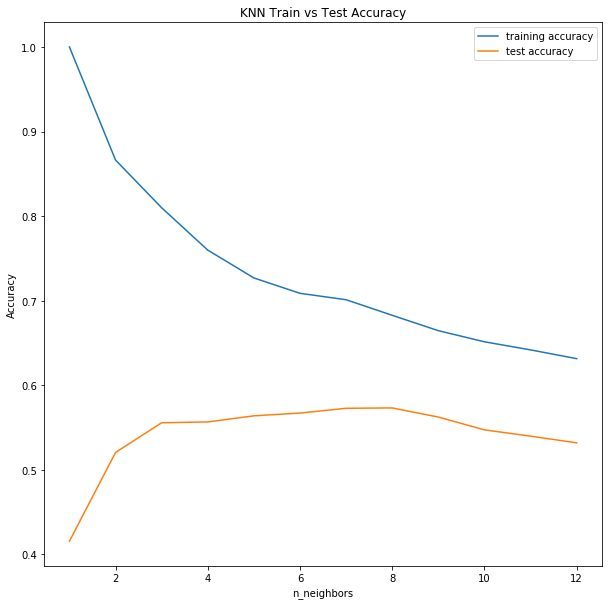

In [33]:
plt.figure(figsize=(10,10))
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 13)
for n_neighbors in neighbors_settings:
    # build the model
    regressor2 = KNeighborsRegressor(n_neighbors=n_neighbors)
    regressor2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(regressor2.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(regressor2.score(X_test, y_test))
#plotting train and test scores for n_neighbors from 1 to 10
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN Train vs Test Accuracy")
plt.legend()
plt.savefig('knn_compare_model')

# Linear Regression

In [34]:
#Since this model has no scaling parameter, we directly apply grid search

lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)


print("train_score for Linear Regression:",l_model.score(X_train, y_train))
print("test_score: for Linear Regression", l_model.score(X_test, y_test))

train_score for Linear Regression: 0.9271573250331037
test_score: for Linear Regression 0.898059304328379


In [35]:
#calculating the accuracies
lg_accuracies = cross_val_score(estimator = l_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lg_accuracies.mean()*100))

Accuracy: 91.45 %


# Ridge Regression

In [36]:
#running Ridge Regression on the dataset
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)
print('validation score: ', grid_model_ridge.best_score_)

{'alpha': 0.1}
validation score:  0.9161663997624524


In [37]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=0.1)
ridge_model=ridge_1.fit(X_train,y_train)

print("train_score for ridge regression:",ridge_model.score(X_train,y_train))
print("test_score for ridge regression:",ridge_model.score(X_test,y_test))

train_score for ridge regression: 0.927085695384411
test_score for ridge regression: 0.8986424742017015


In [38]:
#calculating the accuracies
rg_accuracies = cross_val_score(estimator = ridge_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rg_accuracies.mean()*100))

Accuracy: 91.57 %


# Lasso Regression

In [39]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)
print('validation score: ', grid_model_lasso.best_score_)

{'alpha': 10}
validation score:  0.9170685480458178


In [40]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=10, tol=0.1)
lasso_model=lasso_1.fit(X_train,y_train)
train_score.append(lasso_model.score(X_train,y_train))
test_score.append(lasso_model.score(X_test,y_test))

test=round(lasso_model.score(X_test,y_test),2)

print("train_score for Lasso Regression:",lasso_model.score(X_train,y_train))
print("test_score for Lasso Regression:",lasso_model.score(X_test,y_test))

train_score for Lasso Regression: 0.923100412792801
test_score for Lasso Regression: 0.8964710556310914


In [41]:
#calculating the accuracies
lasg_accuracies = cross_val_score(estimator = lasso_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lasg_accuracies.mean()*100))

Accuracy: 91.69 %


# Polynomial Regression

In [42]:
#running Polynomial Regression on the dataset

pipe = make_pipeline(
    MinMaxScaler(),
  PolynomialFeatures(),
    Ridge())
param_grid = {'polynomialfeatures__degree': [2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [43]:
#using gridsearch
poly = GridSearchCV(pipe, param_grid=param_grid, cv=10, n_jobs=-1,return_train_score=True)
poly.fit(X_train, y_train)
train=poly.cv_results_['mean_train_score']
#print("Training score: {}".format(train.mean()))
#print("Test score: {}".format(test.mean()))
print("Best cross-validation score: {}".format(poly.best_score_))
print("Best parameters: {}".format(poly.best_params_))

poly_train = print(round(train.mean(),2))
poly_test = print(round(test.mean(),2))

Best cross-validation score: 0.9166023626058113
Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}
0.92
0.9


In [44]:
#calculating the accuracy
log=LinearRegression()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
log_model=log.fit(X_train_poly, y_train)
pg_accuracies = cross_val_score(estimator = log_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(pg_accuracies.mean()*100))

Accuracy: 91.45 %


# Linear SVR

In [45]:
param_grid = {'C': [ 100, 1000, 10000], 'epsilon' : [1, 10, 100, 1000]}

linearsvr = LinearSVR()
grid_svrl = GridSearchCV(linearsvr, param_grid, return_train_score=True, cv=10)


grid_svrl.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'epsilon': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [46]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 10000, 'epsilon': 1000}
Best cross-validation score: 0.9073


In [47]:
lsvr = LinearSVR(C = 10000, epsilon = 1000)
        
lsvr.fit(X_train, y_train)

print("train_score for linearSVR: ",lsvr.score(X_train, y_train))
print("test_score for linearSVR: ", lsvr.score(X_test, y_test))

train_score for linearSVR:  0.9186924662694717
test_score for linearSVR:  0.8932875932688322


In [48]:
#calculating the accuracy
linsvr_accuracies = cross_val_score(estimator = lsvr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(linsvr_accuracies.mean()*100))

Accuracy: 90.74 %


# Kernel SVM (RBF)

In [49]:
#running Kernel SVM(RBF) Regression on the dataset

tuning_parameters = [{'C': [10, 100, 1000, 100000], 'gamma': [10, 1, 0.1,0.01, 0.001]}]

#Grid model
rbf_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=tuning_parameters,cv=10)
rbf_svm_model=rbf_svm_grid.fit(X_train,y_train) 
print(rbf_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( rbf_svm_model.best_score_))

{'C': 10000, 'gamma': 0.1}
Validation score:0.84


In [52]:
#General model based on the C and gamma condition populated above
rbf_svr=svm.SVR(C=100000,gamma=0.1)
rbf_svr_model=rbf_svr.fit(X_train,y_train)
train_rbf=round(rbf_svr_model.score(X_train,y_train),2)
test_rbf=round(rbf_svr_model.score(X_test,y_test),2)
print("train_score for rbf kernel SVM:",train_rbf)
print("test_score for rbf kernel SVM:",test_rbf)

train_score for rbf kernel SVM: 0.93
test_score for rbf kernel SVM: 0.89


In [53]:
#calculating the accuracy
rbf_accuracies = cross_val_score(estimator = rbf_svr_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rbf_accuracies.mean()*100))

Accuracy: 91.43 %


# Kernel SVM (Poly)

In [55]:
#running Kernel SVM(Poly) on the dataset

tuning_parameters = [{'C': [ 100, 1000, 10000],'degree':[3, 4, 5, 6, 7, 8, 9],'gamma':['auto','scale']}]

#Grid model
poly_svm_grid = GridSearchCV(svm.SVR(kernel='poly'), param_grid=tuning_parameters,cv=10)
poly_svm_model=poly_svm_grid.fit(X_train,y_train) 
print(poly_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( poly_svm_model.best_score_)) 

{'C': 10000, 'degree': 3, 'gamma': 'scale'}
Validation score:0.91


In [56]:
#General model based on the C, gamma, degree condition populated above
poly_svr=svm.SVR(C=10000,kernel='poly',degree= 3,gamma='scale')
poly_svr_model=poly_svr.fit(X_train,y_train)
print("train_score for poly kernel SVM:", poly_svr_model.score(X_train,y_train))
print("test_score for poly kernel SVM:", poly_svr_model.score(X_test,y_test))

train_score for poly kernel SVM: 0.931233498331567
test_score for poly kernel SVM: 0.8711625997102042


In [57]:
#calculating the accuracy
ksvmp_accuracies = cross_val_score(estimator = poly_svr_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(ksvmp_accuracies.mean()*100))

Accuracy: 91.19 %


# Kernel SVM (Linear)

In [61]:
#running Kernel SVM(Linear) on the dataset
tuning_parameters = [{'C': [100, 1000, 10000],'gamma': [100, 10, 1]}]

#Grid model
svm_grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=tuning_parameters,cv=10)
svm_model=svm_grid.fit(X_train,y_train) 
print(svm_model.best_params_)
print('Validation score:', svm_model.best_score_) 


{'C': 10000, 'gamma': 100}
Validation score: 0.9156688271999556


In [62]:
#General model based on the C, gamma condition populated above
svr=svm.SVR(C=10000,kernel='linear',gamma=100)
svr_model=svr.fit(X_train,y_train)

print("train_score for kernel SVM Linear:", svr_model.score(X_train,y_train))
print("test_score for kernel SVM Linear:", svr_model.score(X_test,y_test))

train_score for kernel SVM Linear: 0.9252267915684751
test_score for kernel SVM Linear: 0.8987829112736042


In [63]:
#calculating the accuracy
ksvml_accuracies = cross_val_score(estimator = svr_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(ksvml_accuracies.mean()*100))

Accuracy: 91.57 %


# Decision Tree Regressor

In [58]:

#Using gridsearch to find the best hyperparameter values for the model

param_grid = {'max_depth': np.arange(3, 10)}
dtree_grid = GridSearchCV(DecisionTreeRegressor(), param_grid)
dtree_grid.fit(X_train, y_train)

print(dtree_grid.best_params_)
print('Validation score:', dtree_grid.best_score_) 

{'max_depth': 9}
Validation score: 0.8672362198620522


In [59]:
dtree = DecisionTreeRegressor(max_depth=9, random_state = 0)
dtree.fit(X_train, y_train)

print("train_score for decision tree:", dtree.score(X_train,y_train))
print("test_score for decision tree:", dtree.score(X_test,y_test))

train_score for decision tree: 0.9674450197287345
test_score for decision tree: 0.8491252821202724


In [60]:
#calculating the accuracy

dtree_accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(dtree_accuracies.mean()*100))

Accuracy: 87.07 %


Appending all the scores in a grid shaped box shown below

In [64]:
models_reg=[]
models_reg.append({'Model Name' : 'KNN Regression','Train score': round(knn_model.score(X_train,y_train),2),
               'Test score': round(knn_model.score(X_test,y_test),2),'Accuracy Score' : (knn_accuracies.mean()*100) })

models_reg.append({'Model Name' : 'Linear Regression','Train score': round(l_model.score(X_train, y_train),2),
               'Test score': round(l_model.score(X_test, y_test),2),'Accuracy Score' : (lg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Ridge Regression','Train score': round(ridge_model.score(X_train,y_train),2),
                         'Test score': round(ridge_model.score(X_test,y_test),2), 'Accuracy Score' : (rg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Lasso Regression','Train score': round(lasso_model.score(X_train,y_train),2),
                         'Test score': round(lasso_model.score(X_test,y_test),2), 'Accuracy Score' : (lasg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Polynomial Regression','Train score': (round(train.mean(),2)),
                         'Test score': (round(test.mean(),2)), 'Accuracy Score' : (pg_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Linear SVR','Train score': round(lsvr.score(X_train,y_train),2),
                         'Test score': round(lsvr.score(X_test,y_test),2),'Accuracy Score' : (linsvr_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM RBF','Train score': round(rbf_svr_model.score(X_train,y_train),2),
                         'Test score': round(rbf_svr_model.score(X_test,y_test),2),'Accuracy Score' : (rbf_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Poly','Train score': round(poly_svr_model.score(X_train,y_train),2),
                         'Test score': round(poly_svr_model.score(X_test,y_test),2),'Accuracy Score' : (ksvmp_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Kernel SVM Linear','Train score': round(svr_model.score(X_train,y_train),2),
                         'Test score': round(svr_model.score(X_test,y_test),2),'Accuracy Score' : (ksvml_accuracies.mean()*100)})

models_reg.append({'Model Name' : 'Decision Tree','Train score': round(dtree.score(X_train,y_train),2),
                         'Test score': round(dtree.score(X_test,y_test),2),'Accuracy Score' : (dtree_accuracies.mean()*100)})

In [65]:
model_reg = pd.DataFrame(models_reg)
model_reg.set_index('Model Name', inplace = True)
model_reg

,Train score,Test score,Accuracy Score
Model Name,,,
KNN Regression,1.00,0.60,61.107099
Linear Regression,0.93,0.90,91.446402
Ridge Regression,0.93,0.90,91.569241
Lasso Regression,0.92,0.90,91.691928
Polynomial Regression,0.92,0.90,91.446402
Linear SVR,0.92,0.89,90.742864
Kernel SVM RBF,0.93,0.89,91.433891
Kernel SVM Poly,0.93,0.87,91.194757
Kernel SVM Linear,0.93,0.90,91.566883


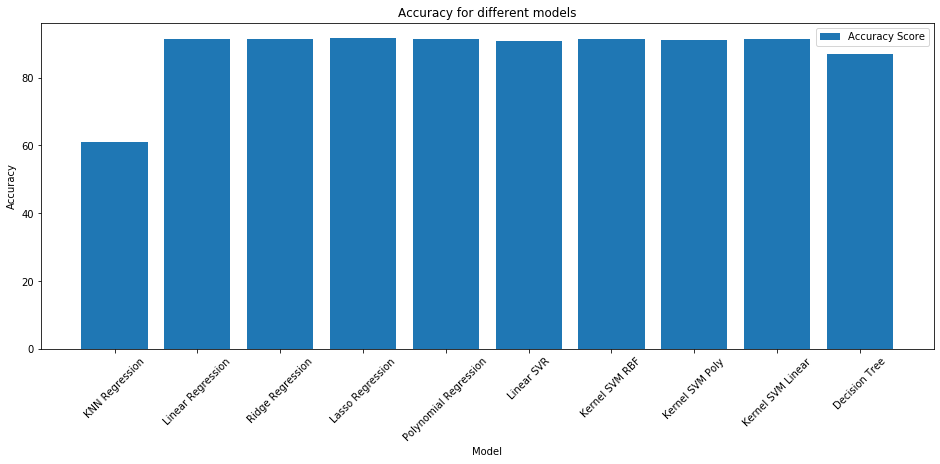

In [66]:
plt.figure(figsize=(16,6))

plt.bar(model_reg.index, model_reg['Accuracy Score'], label="Accuracy Score")

plt.xticks(model_reg.index, rotation = 45)

plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Accuracy for different models")
plt.legend()

# From the above populated accuracies, train score and test score, we can say that Lasso Regression performs the best with 91.69% accuracy

In [67]:
#predicting the values for the best model
y_pred = lasso_model.predict(X_test)
r2_score(y_test, y_pred)

0.8964710556310914